In [2]:
import numpy as np
from matplotlib import pyplot as plt

# Уравнение Ван дер Поля

In [177]:
def dSdx(t, S, a):
    y, v = S
    return np.array([v, a*(1 - y**2)*v - y])


y0 = 2
v0 = 0
x0 = 0

In [178]:
def runge_kutta4(x0, y0, x, h, dF, a):
    n = (int)((x - x0)/h)
    y = np.copy(y0)
    for i in range(1, n + 1):
        
        k1 = h * dF(x0, y, a)
        k2 = h * dF(x0 + 0.5 * h, y + 0.5 * k1, a)
        k3 = h * dF(x0 + 0.5 * h, y + 0.5 * k2, a)
        k4 = h * dF(x0 + h, y + k3, a)

        y = y + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)
 
        x0 = x0 + h
    return y

def euler(x0, y0, x, h, dF, a):
    y = np.copy(y0)
    while x0 < x:
        y = y + h * dF(x0, y, a)
        x0 = x0 + h
    return y

/var/folders/3h/fywk_2bj05b835jspdxg__2r0000gn/T/ipykernel_3501/3066156276.py:3: RuntimeWarning: overflow encountered in scalar multiply
  return np.array([v, a*(1 - y**2)*v - y])
/var/folders/3h/fywk_2bj05b835jspdxg__2r0000gn/T/ipykernel_3501/3066156276.py:3: RuntimeWarning: overflow encountered in scalar power
  return np.array([v, a*(1 - y**2)*v - y])
/var/folders/3h/fywk_2bj05b835jspdxg__2r0000gn/T/ipykernel_3501/3066156276.py:3: RuntimeWarning: invalid value encountered in scalar subtract
  return np.array([v, a*(1 - y**2)*v - y])
/var/folders/3h/fywk_2bj05b835jspdxg__2r0000gn/T/ipykernel_3501/3896048342.py:11: RuntimeWarning: invalid value encountered in add
  y = y + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)


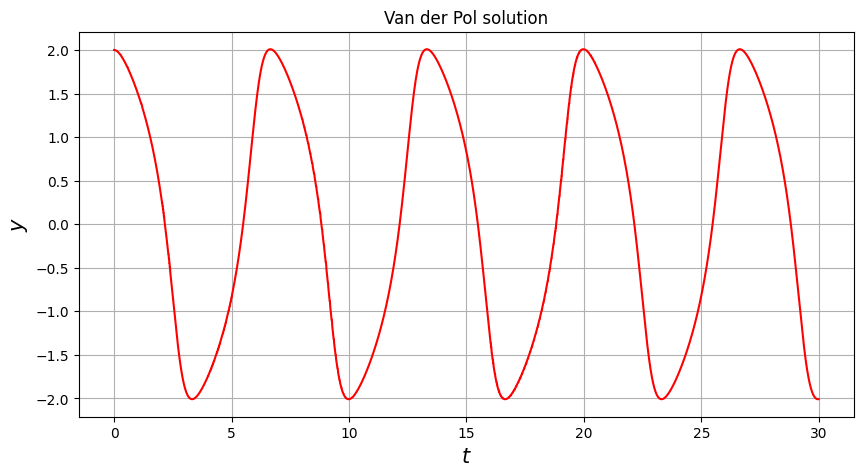

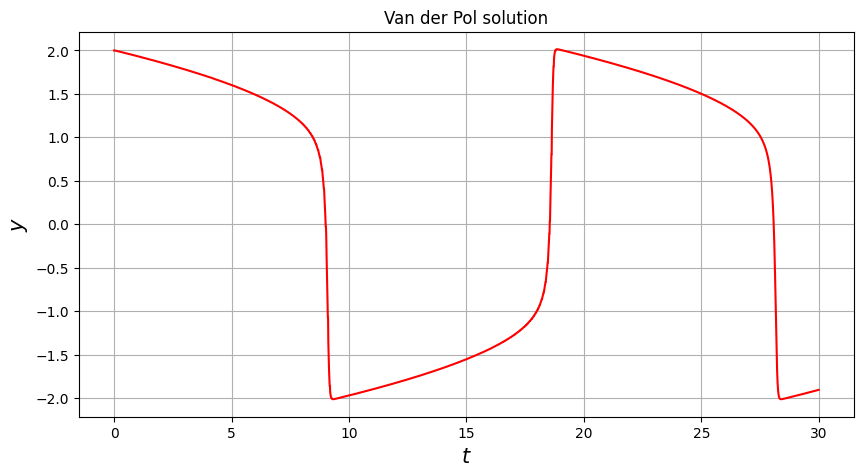

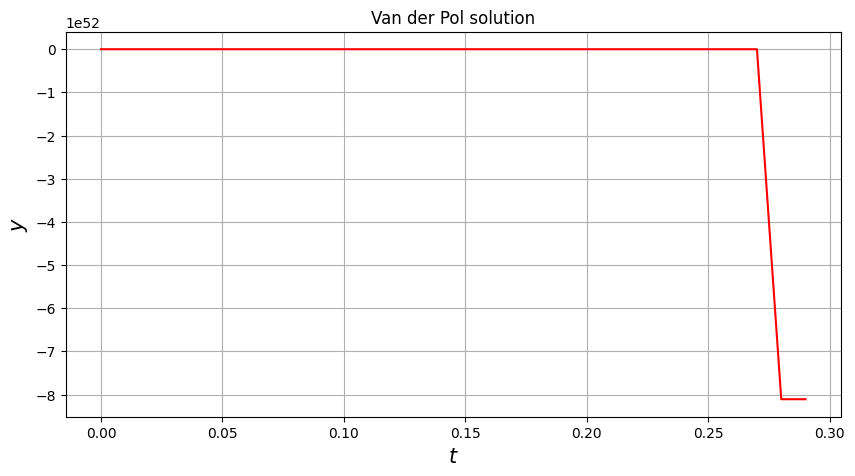

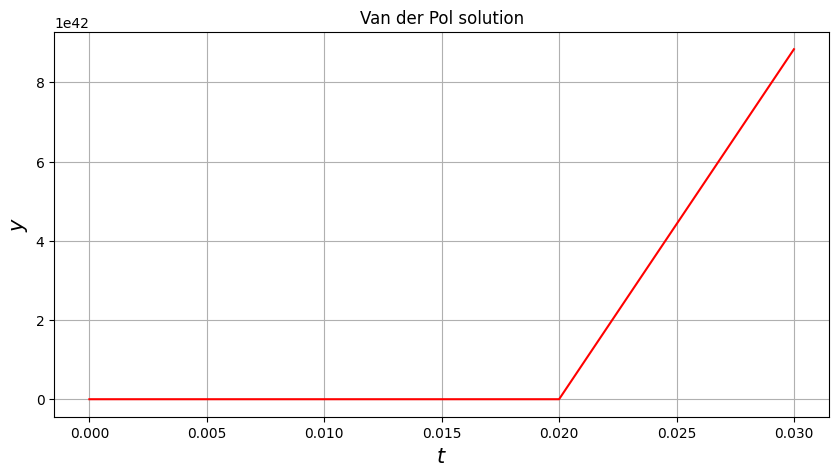

In [181]:
a = [1, 10, 100, 1000]
tau = 0.01

t = np.arange(0, 30 + tau, tau)
S = np.array([y0, v0])

y = []

for i in t:
    y.append(runge_kutta4(x0, S, i, tau, dSdx, a[0]))

y = np.array(y)

plt.figure(figsize = (10,5))
plt.plot(t, y.T[0], 'r')
plt.title(r'Van der Pol solution')
plt.xlabel(r'$t$', fontsize = 15)
plt.ylabel(r'$y$', fontsize = 15)
plt.grid(True)



y = []
for i in t:
    y.append(runge_kutta4(x0, S, i, tau, dSdx, a[1]))

y = np.array(y)

plt.figure(figsize = (10,5))
plt.plot(t, y.T[0], 'r')
plt.title(r'Van der Pol solution')
plt.xlabel(r'$t$', fontsize = 15)
plt.ylabel(r'$y$', fontsize = 15)
plt.grid(True)

y = []
for i in t:
    y.append(runge_kutta4(x0, S, i, tau, dSdx, a[2]))

y = np.array(y)

plt.figure(figsize = (10,5))
plt.plot(t, y.T[0], 'r')
plt.title(r'Van der Pol solution')
plt.xlabel(r'$t$', fontsize = 15)
plt.ylabel(r'$y$', fontsize = 15)
plt.grid(True)


y = []
for i in t:
    y.append(runge_kutta4(x0, S, i, tau, dSdx, a[3]))

y = np.array(y)

plt.figure(figsize = (10,5))
plt.plot(t, y.T[0], 'r')
plt.title(r'Van der Pol solution')
plt.xlabel(r'$t$', fontsize = 15)
plt.ylabel(r'$y$', fontsize = 15)
plt.grid(True)

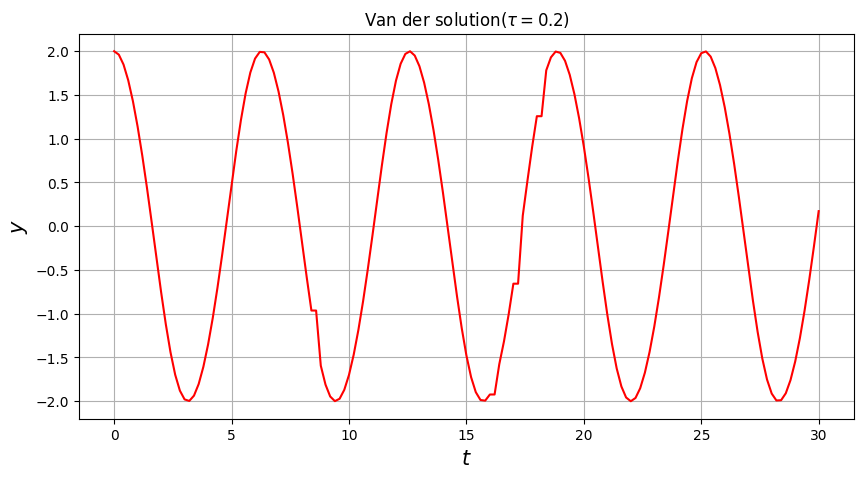

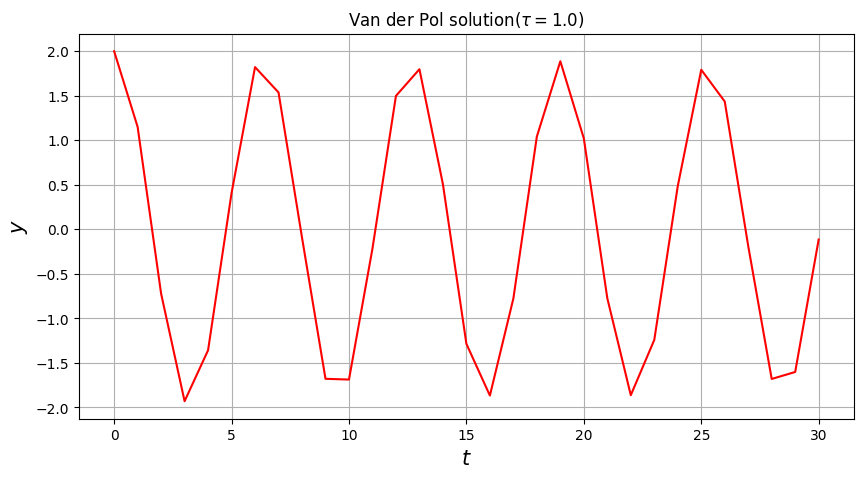

In [205]:
tau = 0.2

t = np.arange(0, 30 + tau, tau)
S = np.array([y0, v0])

y = []

for i in t:
    y.append(runge_kutta4(x0, S, i, tau, dSdx, 0.1))

y = np.array(y)

plt.figure(figsize = (10,5))
plt.plot(t, y.T[0], 'r')
plt.title(r'Van der solution$(\tau = 0.2)$')
plt.xlabel(r'$t$', fontsize = 15)
plt.ylabel(r'$y$', fontsize = 15)
plt.grid(True)

tau = 1.0

t = np.arange(0, 30 + tau, tau)
S = np.array([y0, v0])

y = []

for i in t:
    y.append(runge_kutta4(x0, S, i, tau, dSdx, 0.1))

y = np.array(y)

plt.figure(figsize = (10,5))
plt.plot(t, y.T[0], 'r')
plt.title(r'Van der Pol solution$(\tau = 1.0)$')
plt.xlabel(r'$t$', fontsize = 15)
plt.ylabel(r'$y$', fontsize = 15)
plt.grid(True)

При $\tau \geq 1.0$ - решение сильно отличается

## Сравнение с методом Рунге-Кутты 4 порядка

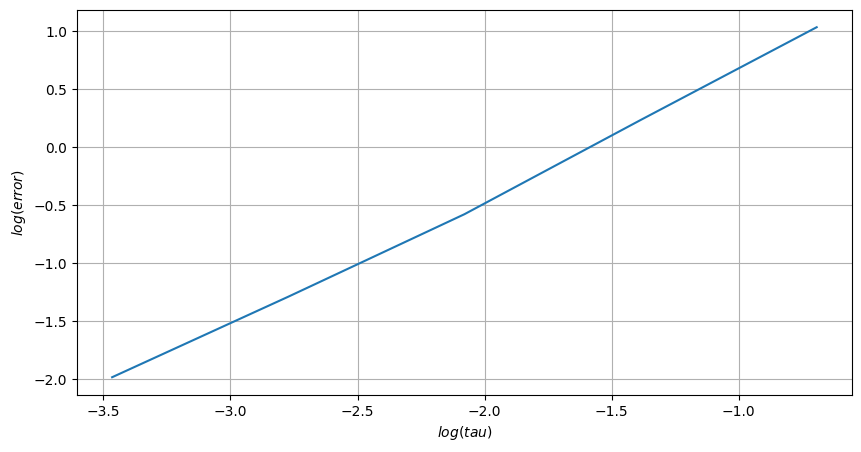

In [168]:
tau_arr = [1 / (2**i) for i in range(1, 6)]

error = []

for tau_i in tau_arr:
    t = np.arange(0, 30 + tau_i, tau_i)
    S = np.array([y0, v0])

    y_e = []
    y_r = []

    for i in t:
        y_e.append(euler(x0, S, i, tau_i, dSdx, 0.1))
        y_r.append(runge_kutta4(x0, S, i, tau_i, dSdx, 0.1))

    y_e = np.array(y_e)
    y_r = np.array(y_r)

    #print(y_r[0:5])

    error.append(np.mean(np.abs(y_r - y_e)))


error_ln = np.log(error)
tau_ln = np.log(tau_arr)

plt.figure(figsize = (10, 5))
plt.plot(tau_ln, error_ln)
plt.grid(True)
plt.xlabel("$log(tau)$")
plt.ylabel("$log(error)$")
plt.show()

#print(error)

## Построим фазовый портрет

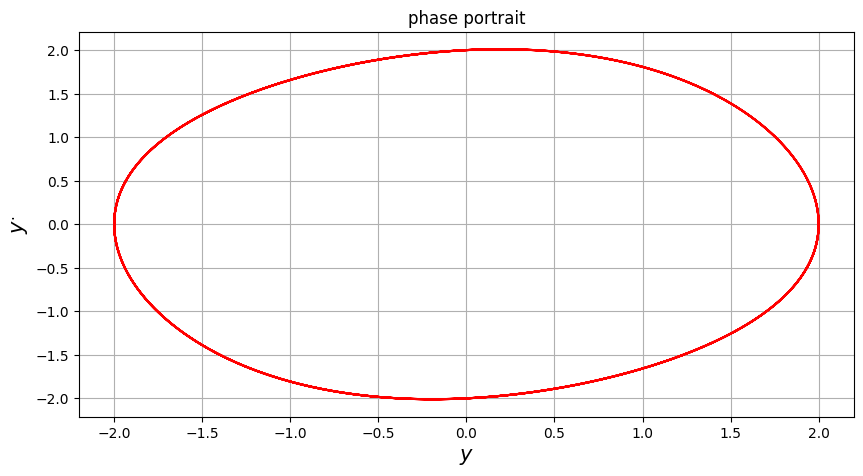

In [206]:
tau = 0.01

t = np.arange(0, 30 + tau, tau)
S = np.array([y0, v0])

y = []

for i in t:
    y.append(runge_kutta4(x0, S, i, tau, dSdx, 0.1))

y = np.array(y)

plt.figure(figsize = (10,5))
plt.plot(y.T[0], y.T[1], 'r')
plt.title(r'phase portrait')
plt.xlabel(r'$y$', fontsize = 15)
plt.ylabel(r'$y^{.}$', fontsize = 15)
plt.grid(True)

# Уравнение Эйлера

In [207]:
def dSdx2(t, S):
    x, v = S
    return np.array([v, -v/t - 100*x/(t*t)])

def runge_kutta4(x0, y0, x, h, dF):
    n = (int)((x - x0)/h)
    y = np.copy(y0)
    for i in range(1, n + 1):
        
        k1 = h * dF(x0, y)
        k2 = h * dF(x0 + 0.5 * h, y + 0.5 * k1)
        k3 = h * dF(x0 + 0.5 * h, y + 0.5 * k2)
        k4 = h * dF(x0 + h, y + k3)

        y = y + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)
 
        x0 = x0 + h
    return y

def euler(x0, y0, x, h, dF):
    y = np.copy(y0)
    while x0 < x:
        y = y + h * dF(x0, y)
        x0 = x0 + h
    return y

x0 = 1
v0 = 1
t0 = 1

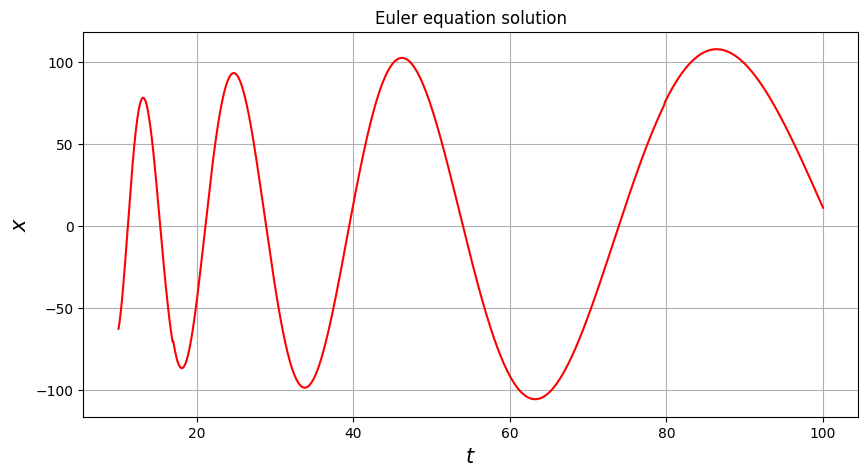

In [210]:
tau = 0.1
t = np.arange(10, 100+tau, tau)

S2 = np.array([x0, v0])

y2 = []

for i in t:
    y2.append(euler(t0, S2, i, tau, dSdx2))

y2 = np.array(y2)

plt.figure(figsize = (10,5))
plt.plot(t, y2.T[0], 'r')
plt.title(r'Euler equation solution')
plt.xlabel(r'$t$', fontsize = 15)
plt.ylabel(r'$x$', fontsize = 15)
plt.grid(True)

## Зависимость от шага по времени

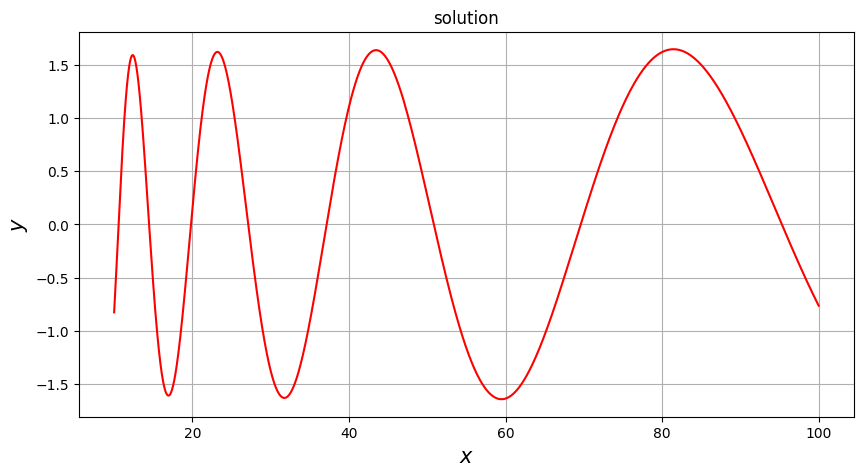

In [108]:
tau = 0.01
t = np.arange(10, 100+tau, tau)

S2 = np.array([x0, v0])

y2 = []

for i in t:
    y2.append(euler(t0, S2, i, tau, dSdx2))

y2 = np.array(y2)

plt.figure(figsize = (10,5))
plt.plot(t, y2.T[0], 'r')
plt.title(r'solution')
plt.xlabel(r'$t$', fontsize = 15)
plt.ylabel(r'$x$', fontsize = 15)
plt.grid(True)

$\tau$ = 0.05

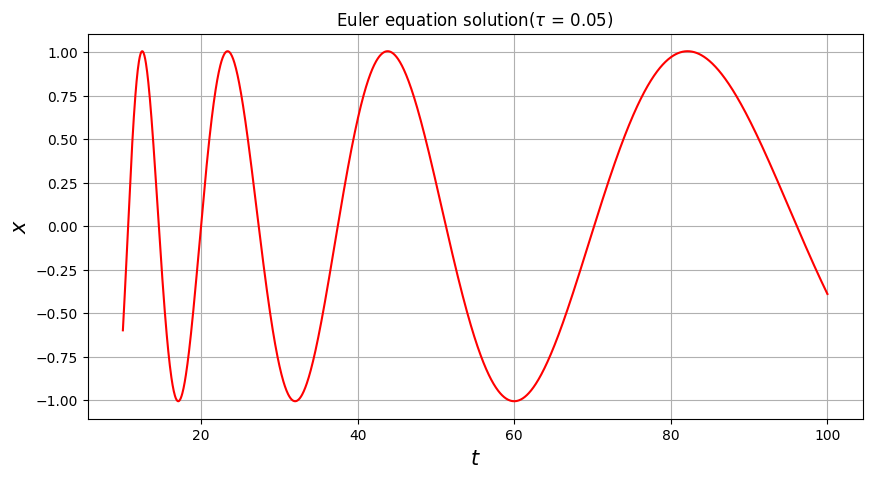

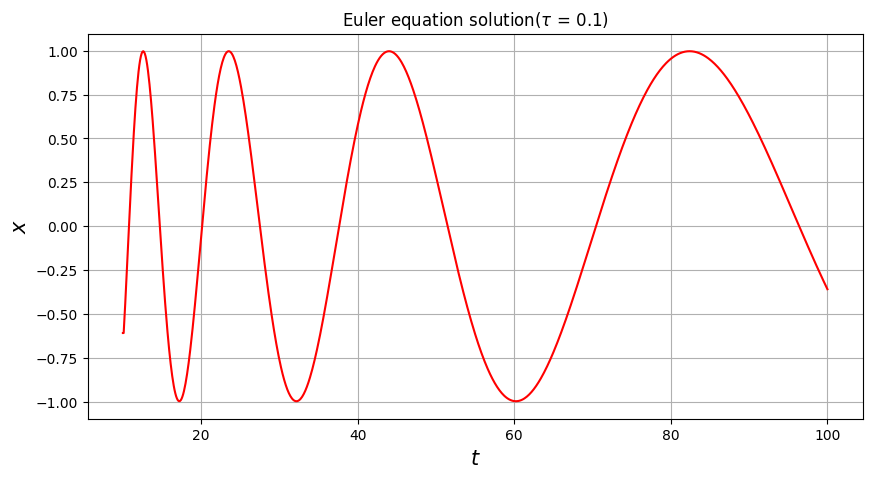

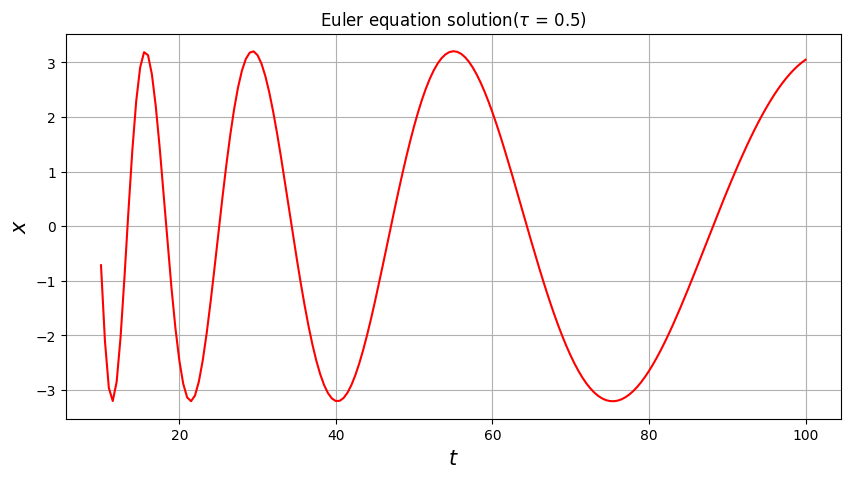

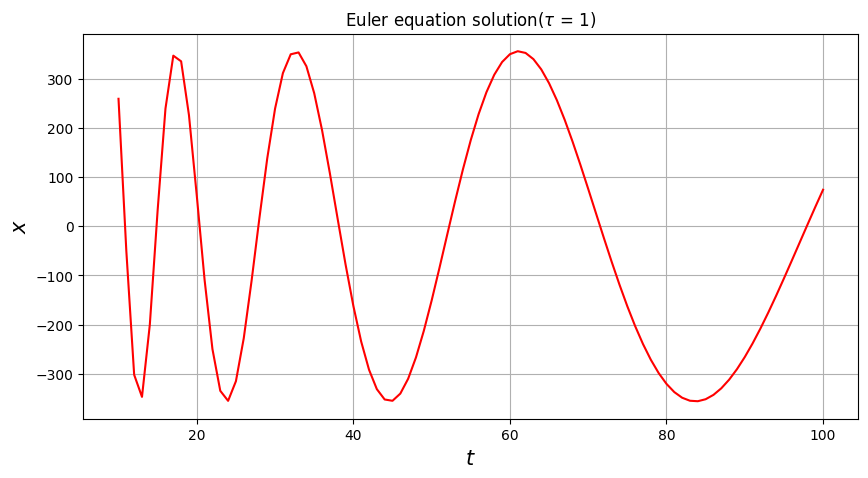

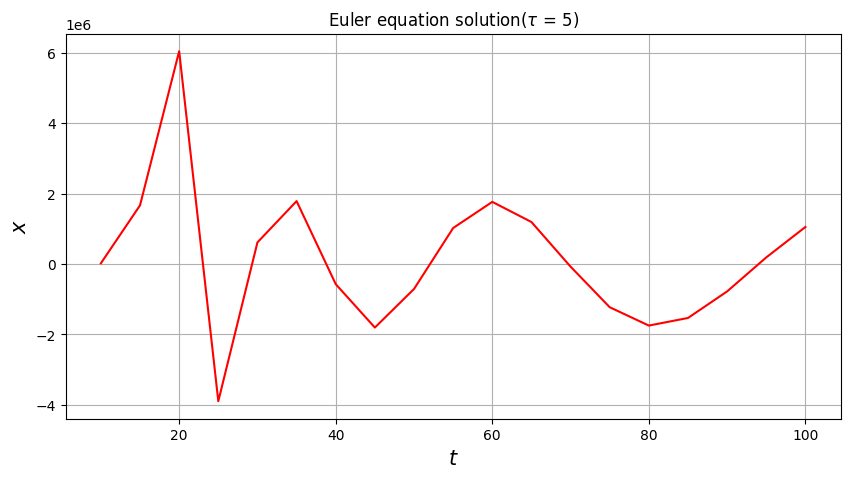

In [211]:
tau = 0.05
t = np.arange(10, 100+tau, tau)

S2 = np.array([x0, v0])

y2 = []

for i in t:
    y2.append(runge_kutta4(t0, S2, i, tau, dSdx2))

y2 = np.array(y2)

plt.figure(figsize = (10,5))
plt.plot(t, y2.T[0], 'r')
plt.title(r'Euler equation solution($\tau$ = 0.05)')
plt.xlabel(r'$t$', fontsize = 15)
plt.ylabel(r'$x$', fontsize = 15)
plt.grid(True)

tau = 0.1
t = np.arange(10, 100+tau, tau)

S2 = np.array([x0, v0])

y2 = []

for i in t:
    y2.append(runge_kutta4(t0, S2, i, tau, dSdx2))

y2 = np.array(y2)

plt.figure(figsize = (10,5))
plt.plot(t, y2.T[0], 'r')
plt.title(r'Euler equation solution($\tau$ = 0.1)')
plt.xlabel(r'$t$', fontsize = 15)
plt.ylabel(r'$x$', fontsize = 15)
plt.grid(True)

tau = 0.5
t = np.arange(10, 100+tau, tau)

S2 = np.array([x0, v0])

y2 = []

for i in t:
    y2.append(runge_kutta4(t0, S2, i, tau, dSdx2))

y2 = np.array(y2)

plt.figure(figsize = (10,5))
plt.plot(t, y2.T[0], 'r')
plt.title(r'Euler equation solution($\tau$ = 0.5)')
plt.xlabel(r'$t$', fontsize = 15)
plt.ylabel(r'$x$', fontsize = 15)
plt.grid(True)


tau = 1
t = np.arange(10, 100+tau, tau)

S2 = np.array([x0, v0])

y2 = []

for i in t:
    y2.append(runge_kutta4(t0, S2, i, tau, dSdx2))

y2 = np.array(y2)

plt.figure(figsize = (10,5))
plt.plot(t, y2.T[0], 'r')
plt.title(r'Euler equation solution($\tau$ = 1)')
plt.xlabel(r'$t$', fontsize = 15)
plt.ylabel(r'$x$', fontsize = 15)
plt.grid(True)


tau = 5
t = np.arange(10, 100+tau, tau)

S2 = np.array([x0, v0])

y2 = []

for i in t:
    y2.append(runge_kutta4(t0, S2, i, tau, dSdx2))

y2 = np.array(y2)

plt.figure(figsize = (10,5))
plt.plot(t, y2.T[0], 'r')
plt.title(r'Euler equation solution($\tau$ = 5)')
plt.xlabel(r'$t$', fontsize = 15)
plt.ylabel(r'$x$', fontsize = 15)
plt.grid(True)

## Сравнение с методом Рунге-Кутты 4 порядка

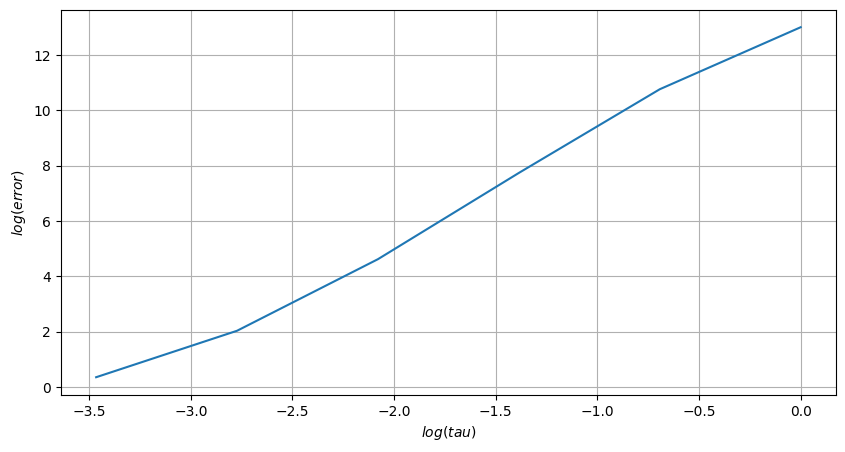

In [212]:
tau_arr = [1 / (2**i) for i in range(0, 6)]

error = []

for tau_i in tau_arr:
    t = np.arange(10, 100 + tau_i, tau_i)
    S2 = np.array([x0, v0])

    y_e = []
    y_r = []

    for i in t:
        y_e.append(euler(t0, S2, i, tau_i, dSdx2))
        y_r.append(runge_kutta4(t0, S2, i, tau_i, dSdx2))

    y_e = np.array(y_e)
    y_r = np.array(y_r)

    #print(y_r[0:5])

    error.append(np.mean(np.abs(y_r - y_e)))


error_ln = np.log(error)
tau_ln = np.log(tau_arr)

plt.figure(figsize = (10, 5))
plt.plot(tau_ln, error_ln)
plt.grid(True)
plt.xlabel("$log(tau)$")
plt.ylabel("$log(error)$")
plt.show()

#print(error)

In [215]:
k = (error_ln[2] - error_ln[1]) / (tau_ln[2] - tau_ln[1])
k

4.3600392921062685

$k \approx 4.4$

## Фазовый портрет

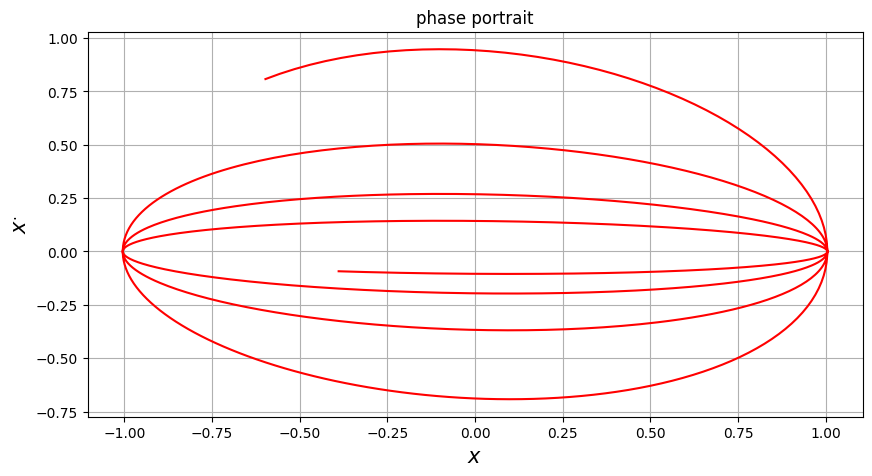

In [216]:
tau = 0.05
t = np.arange(10, 100+tau, tau)

S2 = np.array([x0, v0])

y2 = []

for i in t:
    y2.append(runge_kutta4(t0, S2, i, tau, dSdx2))

y2 = np.array(y2)

plt.figure(figsize = (10,5))
plt.plot(y2.T[0], y2.T[1], 'r')
plt.title(r'phase portrait')
plt.xlabel(r'$x$', fontsize = 15)
plt.ylabel(r'$x^{.}$', fontsize = 15)
plt.grid(True)


# Уравнение Капицы

In [217]:
def dSdx3(t, S, A, w):
    theta, v = S
    return np.array([v, (1/10)*(A*w*w*np.sin(w*t) - 4.9)*np.sin(theta)])

def runge_kutta4(x0, y0, x, h, dF, A, w):
    n = (int)((x - x0)/h)
    y = np.copy(y0)
    for i in range(1, n + 1):
        
        k1 = h * dF(x0, y, A, w)
        k2 = h * dF(x0 + 0.5 * h, y + 0.5 * k1, A, w)
        k3 = h * dF(x0 + 0.5 * h, y + 0.5 * k2, A, w)
        k4 = h * dF(x0 + h, y + k3, A, w)

        y = y + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)
 
        x0 = x0 + h
    return y

def euler(x0, y0, x, h, dF, A, w):
    y = np.copy(y0)
    while x0 < x:
        y = y + h * dF(x0, y, A, w)
        x0 = x0 + h
    return y


v0 = 0
t0 = 0

A = [0.5, 10.0, 10.0, 2.0, 0.5]
w = [5.3, 100.0, 100.0, 100.0, 200.0]
theta0 = [3.1, 3.1, 0.1, 0.1, 0.05]

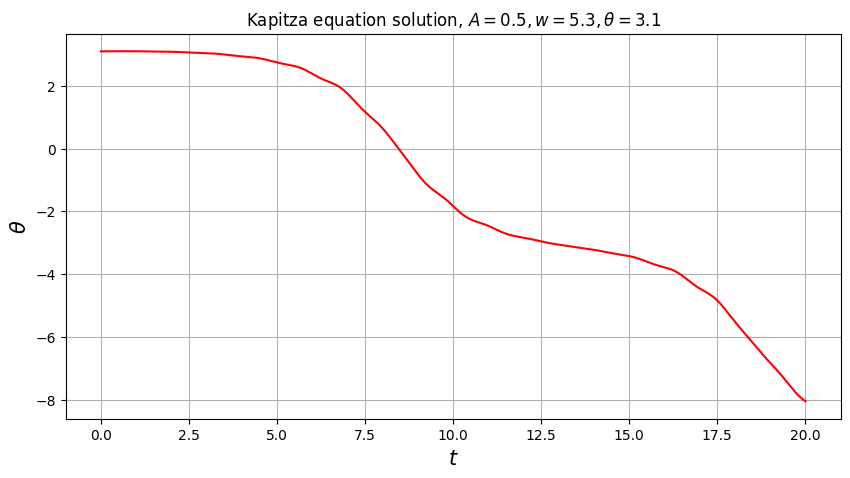

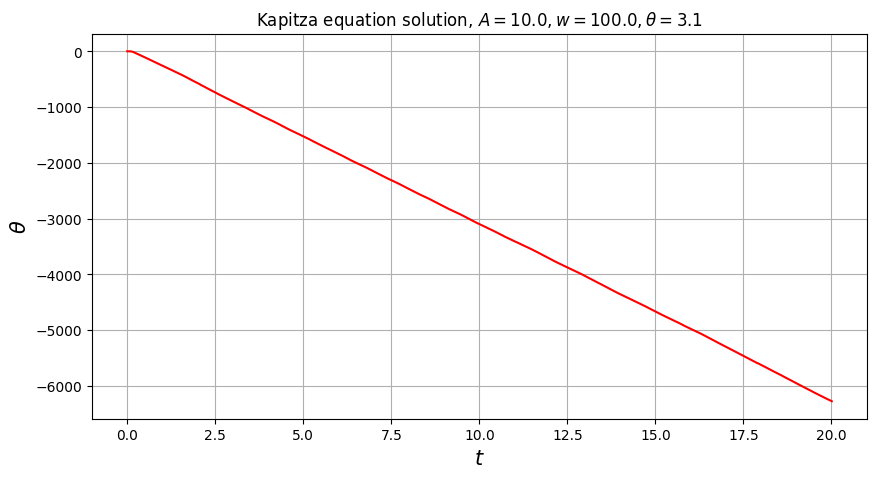

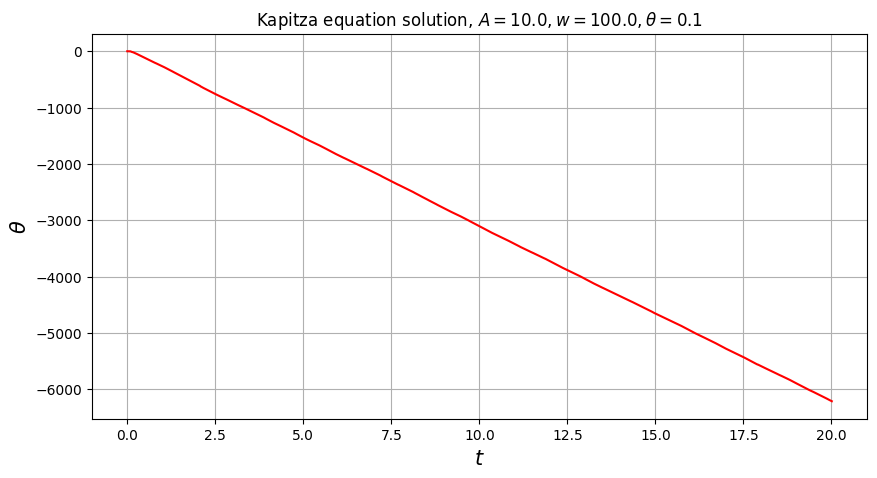

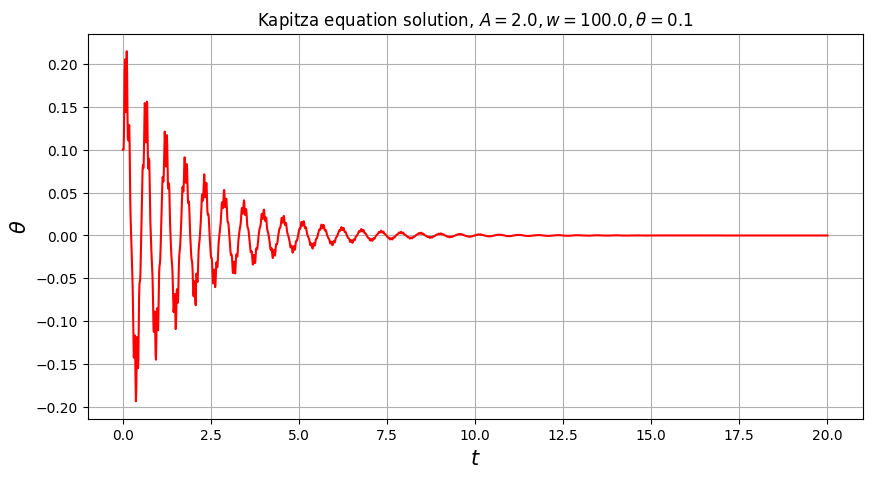

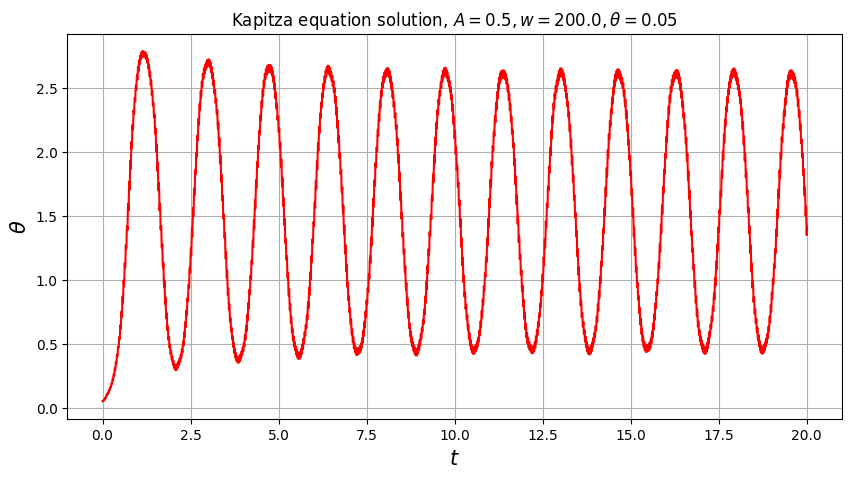

In [219]:
tau = 0.01
t = np.arange(0, 20+tau, tau)

S3 = np.array([theta0[0], v0])

y3 = []

for i in t:
    y3.append(euler(t0, S3, i, tau, dSdx3, A[0], w[0]))

y3 = np.array(y3)

plt.figure(figsize = (10,5))
plt.plot(t, y3.T[0], 'r')
plt.title(r'Kapitza equation solution, $A=0.5, w=5.3, \theta = 3.1$')
plt.xlabel(r'$t$', fontsize = 15)
plt.ylabel(r'$\theta$', fontsize = 15)
plt.grid(True)

tau = 0.01
t = np.arange(0, 20+tau, tau)

S3 = np.array([theta0[1], v0])

y3 = []

for i in t:
    y3.append(euler(t0, S3, i, tau, dSdx3, A[1], w[1]))

y3 = np.array(y3)

plt.figure(figsize = (10,5))
plt.plot(t, y3.T[0], 'r')
plt.title(r'Kapitza equation solution, $A=10.0, w=100.0, \theta = 3.1$')
plt.xlabel(r'$t$', fontsize = 15)
plt.ylabel(r'$\theta$', fontsize = 15)
plt.grid(True)

tau = 0.01
t = np.arange(0, 20+tau, tau)

S3 = np.array([theta0[2], v0])

y3 = []

for i in t:
    y3.append(euler(t0, S3, i, tau, dSdx3, A[2], w[2]))

y3 = np.array(y3)

plt.figure(figsize = (10,5))
plt.plot(t, y3.T[0], 'r')
plt.title(r'Kapitza equation solution, $A=10.0, w=100.0, \theta = 0.1$')
plt.xlabel(r'$t$', fontsize = 15)
plt.ylabel(r'$\theta$', fontsize = 15)
plt.grid(True)


tau = 0.01
t = np.arange(0, 20+tau, tau)

S3 = np.array([theta0[3], v0])

y3 = []

for i in t:
    y3.append(euler(t0, S3, i, tau, dSdx3, A[3], w[3]))

y3 = np.array(y3)

plt.figure(figsize = (10,5))
plt.plot(t, y3.T[0], 'r')
plt.title(r'Kapitza equation solution, $A=2.0, w=100.0, \theta = 0.1$')
plt.xlabel(r'$t$', fontsize = 15)
plt.ylabel(r'$\theta$', fontsize = 15)
plt.grid(True)

tau = 0.01
t = np.arange(0, 20+tau, tau)

S3 = np.array([theta0[4], v0])

y3 = []

for i in t:
    y3.append(euler(t0, S3, i, tau, dSdx3, A[4], w[4]))

y3 = np.array(y3)

plt.figure(figsize = (10,5))
plt.plot(t, y3.T[0], 'r')
plt.title(r'Kapitza equation solution, $A=0.5, w=200.0, \theta = 0.05$')
plt.xlabel(r'$t$', fontsize = 15)
plt.ylabel(r'$\theta$', fontsize = 15)
plt.grid(True)

## Посмотрим на зависимость решения от шага по времени

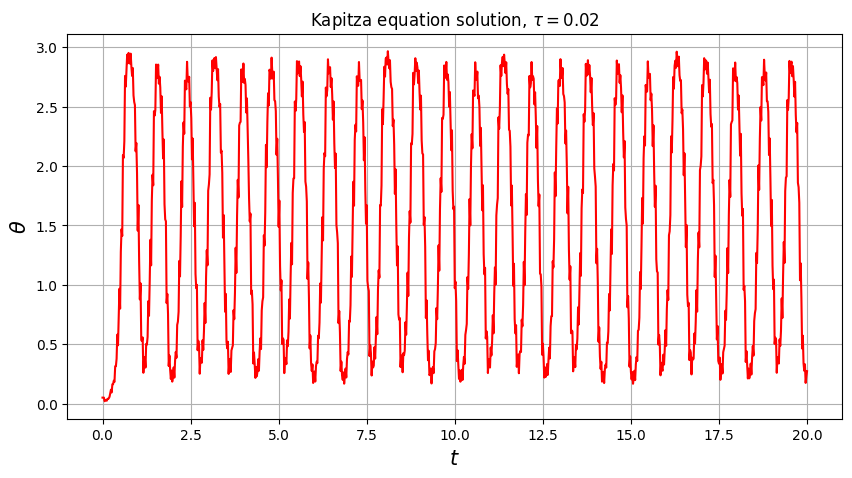

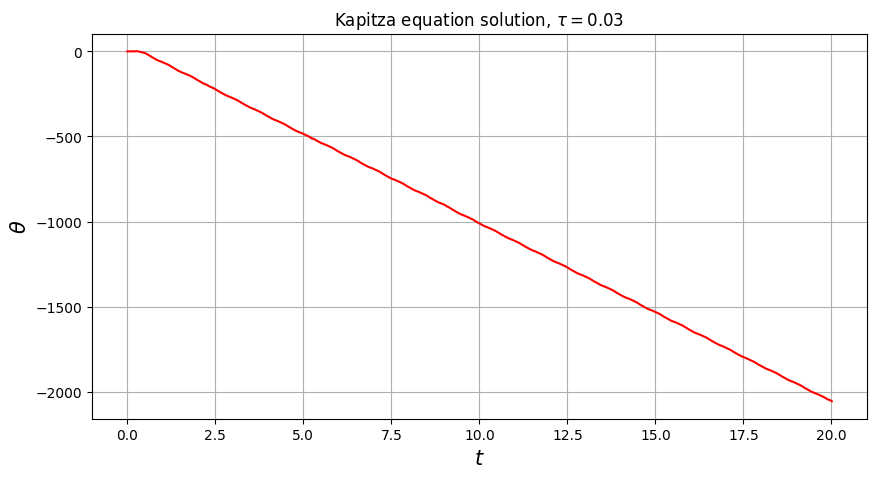

In [220]:
tau = 0.02
t = np.arange(0, 20+tau, tau)

S3 = np.array([theta0[4], v0])

y3 = []

for i in t:
    y3.append(euler(t0, S3, i, tau, dSdx3, A[4], w[4]))

y3 = np.array(y3)

plt.figure(figsize = (10,5))
plt.plot(t, y3.T[0], 'r')
plt.title(r'Kapitza equation solution, $\tau = 0.02$')
plt.xlabel(r'$t$', fontsize = 15)
plt.ylabel(r'$\theta$', fontsize = 15)
plt.grid(True)


tau = 0.03
t = np.arange(0, 20+tau, tau)

S3 = np.array([theta0[4], v0])

y3 = []

for i in t:
    y3.append(euler(t0, S3, i, tau, dSdx3, A[4], w[4]))

y3 = np.array(y3)

plt.figure(figsize = (10,5))
plt.plot(t, y3.T[0], 'r')
plt.title(r'Kapitza equation solution, $\tau = 0.03$')
plt.xlabel(r'$t$', fontsize = 15)
plt.ylabel(r'$\theta$', fontsize = 15)
plt.grid(True)

Расходится при $\tau$ > 0.02

## Сравнение с методом Рунге-Кутты 4 порядка

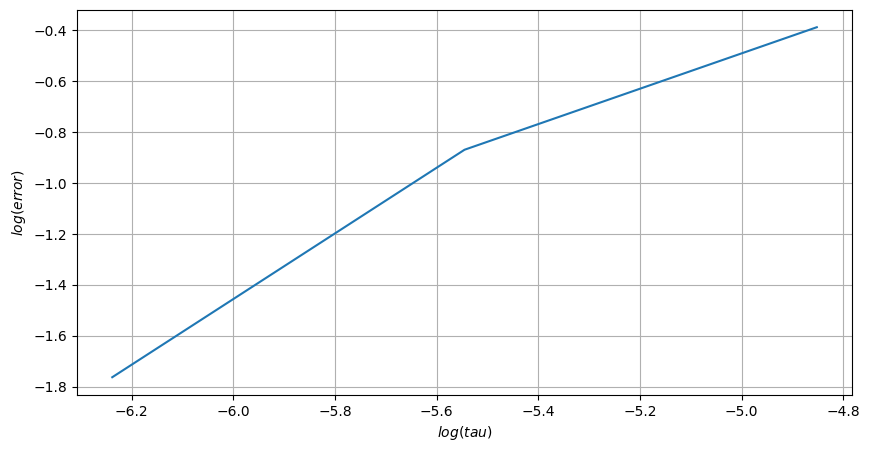

In [223]:
tau_arr = [1 / (2**i) for i in range(7, 10)]

error = []

for tau_i in tau_arr:
    t = np.arange(0, 5 + tau_i, tau_i)
    S3 = np.array([theta0[4], v0])

    y_e = []
    y_r = []

    for i in t:
        y_e.append(euler(t0, S3, i, tau_i, dSdx3, A[4], w[4]))
        y_r.append(runge_kutta4(t0, S3, i, tau_i, dSdx3, A[4], w[4]))

    y_e = np.array(y_e)
    y_r = np.array(y_r)

    error.append(np.mean(np.abs(y_r - y_e)))


error_ln = np.log(error)
tau_ln = np.log(tau_arr)

plt.figure(figsize = (10, 5))
plt.plot(tau_ln, error_ln)
plt.grid(True)
plt.xlabel("$log(tau)$")
plt.ylabel("$log(error)$")
plt.show()

In [224]:
k = (error_ln[2] - error_ln[0]) / (tau_ln[2] - tau_ln[0])
k

0.9920057357394884

$k \approx 1$

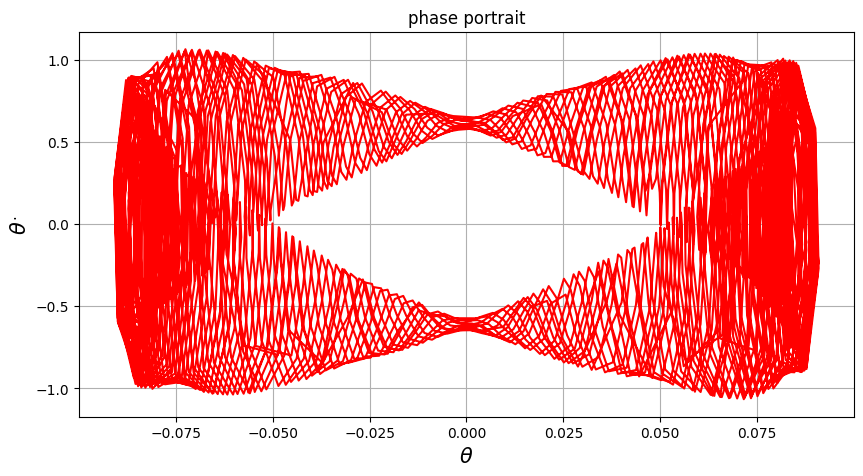

In [228]:
tau = 0.005
t = np.arange(0, 10+tau, tau)

S3 = np.array([theta0[4], v0])

y3 = []

for i in t:
    y3.append(runge_kutta4(t0, S3, i, tau, dSdx3, A[4], w[4]))

y3 = np.array(y3)

plt.figure(figsize = (10,5))
plt.plot(y3.T[0], y3.T[1], 'r')
plt.title(r'phase portrait')
plt.xlabel(r'$\theta$', fontsize = 15)
plt.ylabel(r'$\theta^{.}$', fontsize = 15)
plt.grid(True)

# Уравнение Минорского

In [22]:
def dSdx4(t, S, n, e):
    y, v = S
    return np.array([v, 2*v - n*n*np.pi*np.pi*y + 2*v*(t - 1) + e*(v*v*v)*(t - 1)])

def runge_kutta4(x0, y0, x, h, dF, n, e):
    n = (int)((x - x0)/h)
    y = np.copy(y0)
    for i in range(1, n + 1):
        
        k1 = h * dF(x0, y, n, e)
        k2 = h * dF(x0 + 0.5 * h, y + 0.5 * k1, n, e)
        k3 = h * dF(x0 + 0.5 * h, y + 0.5 * k2, n, e)
        k4 = h * dF(x0 + h, y + k3, n, e)

        y = y + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)
 
        x0 = x0 + h
    return y

def euler(x0, y0, x, h, dF, n, e):
    y = np.copy(y0)
    while x0 < x:   
        y = y + h * dF(x0, y, n, e)
        x0 = x0 + h
    return y


v0 = 0
t0 = 0
y0 = 1

n = [2, 5, 10]
e = [0.3, 0.01, 0.001, 0.0001]

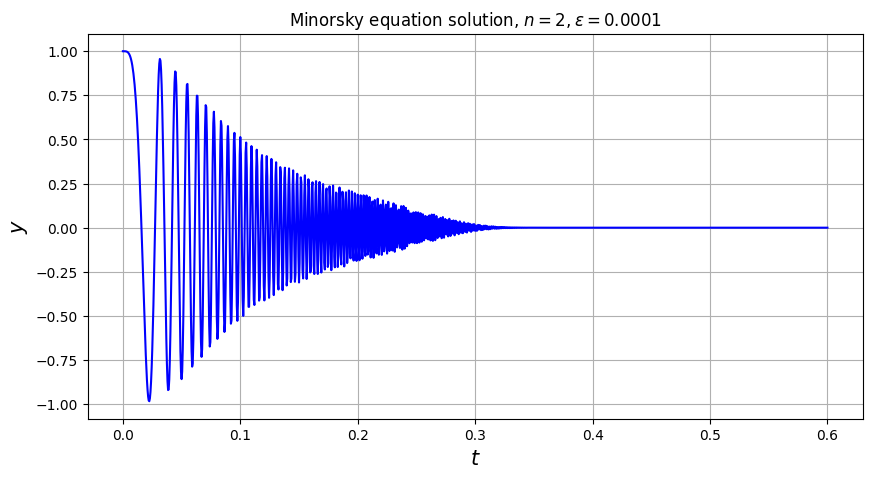

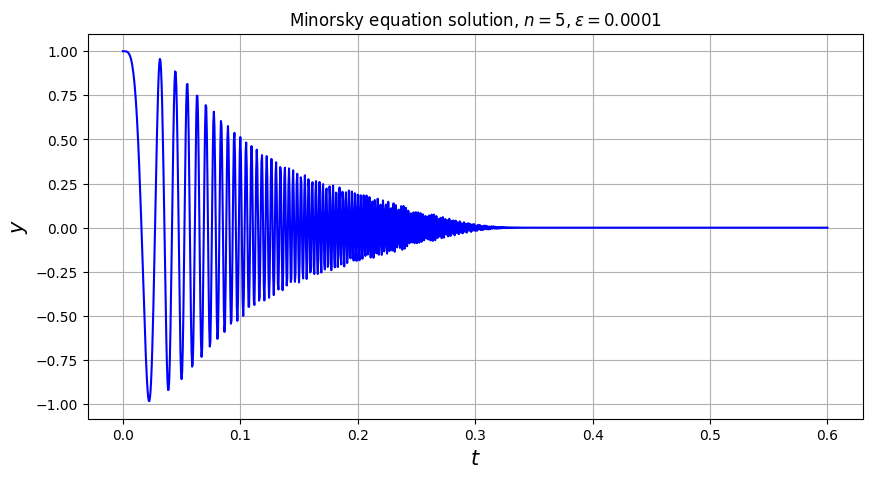

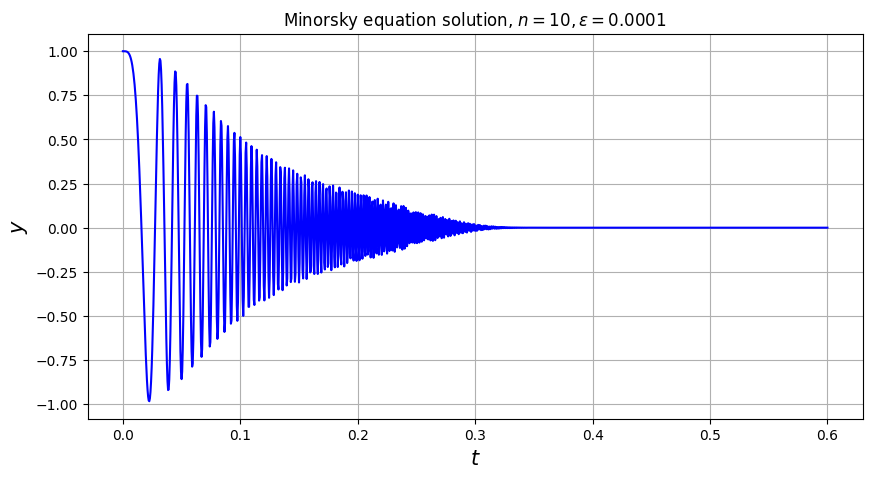

In [21]:
tau = 0.0005
t = np.arange(0, 0.6+tau, tau)

S4 = np.array([y0, v0])

y4 = []

for i in t:
    y4.append(runge_kutta4(t0, S4, i, tau, dSdx4, n[0], e[2]))

y4 = np.array(y4)

plt.figure(figsize = (10,5))
plt.plot(t, y4.T[0], 'b')
plt.title(r'Minorsky equation solution, $n = 2, \epsilon = 0.0001$')
plt.xlabel(r'$t$', fontsize = 15)
plt.ylabel(r'$y$', fontsize = 15)
plt.grid(True)

y4 = []

for i in t:
    y4.append(runge_kutta4(t0, S4, i, tau, dSdx4, n[1], e[2]))

y4 = np.array(y4)

plt.figure(figsize = (10,5))
plt.plot(t, y4.T[0], 'b')
plt.title(r'Minorsky equation solution, $n = 5, \epsilon = 0.0001$')
plt.xlabel(r'$t$', fontsize = 15)
plt.ylabel(r'$y$', fontsize = 15)
plt.grid(True)

y4 = []

for i in t:
    y4.append(runge_kutta4(t0, S4, i, tau, dSdx4, n[2], e[2]))

y4 = np.array(y4)

plt.figure(figsize = (10,5))
plt.plot(t, y4.T[0], 'b')
plt.title(r'Minorsky equation solution, $n = 10, \epsilon = 0.0001$')
plt.xlabel(r'$t$', fontsize = 15)
plt.ylabel(r'$y$', fontsize = 15)
plt.grid(True)

/var/folders/3h/fywk_2bj05b835jspdxg__2r0000gn/T/ipykernel_2215/2835687381.py:3: RuntimeWarning: overflow encountered in scalar multiply
  return np.array([v, 2*v - n*n*np.pi*np.pi*y + 2*v*(t - 1) + e*(v*v*v)*(t - 1)])
/var/folders/3h/fywk_2bj05b835jspdxg__2r0000gn/T/ipykernel_2215/2835687381.py:3: RuntimeWarning: invalid value encountered in scalar add
  return np.array([v, 2*v - n*n*np.pi*np.pi*y + 2*v*(t - 1) + e*(v*v*v)*(t - 1)])


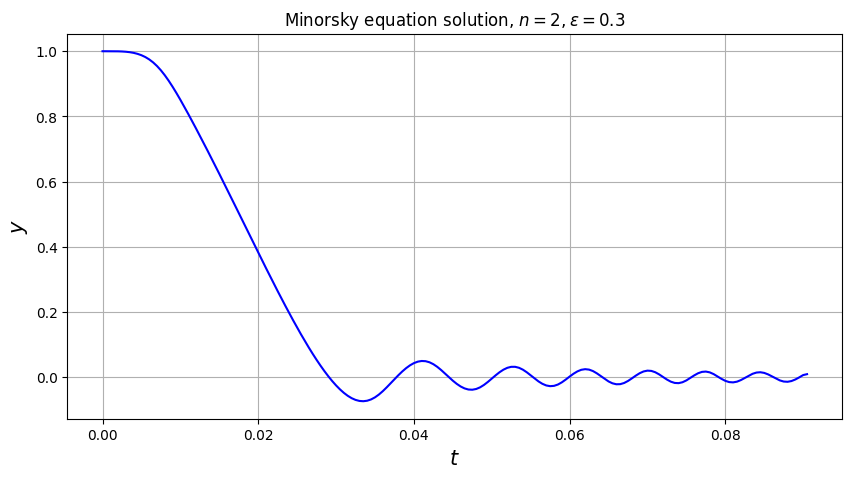

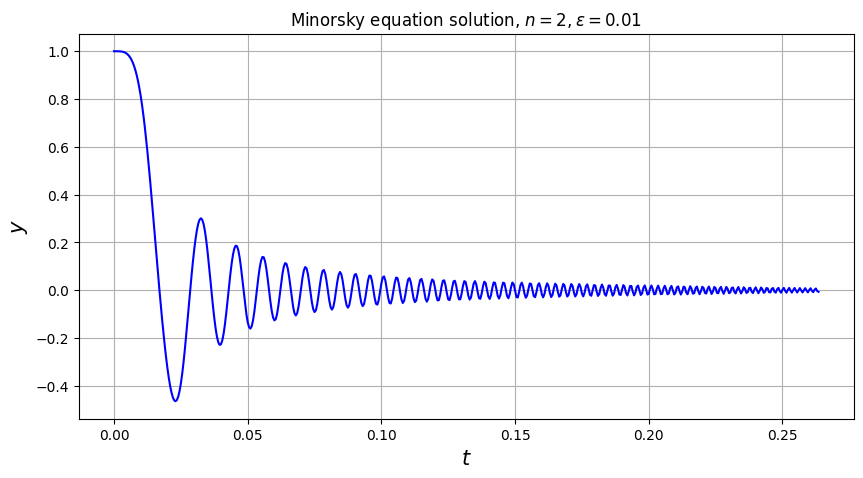

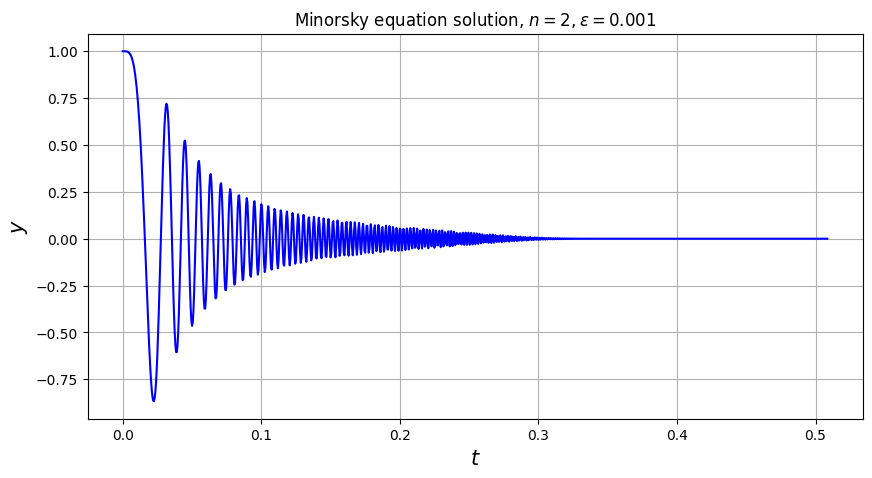

In [25]:
y4 = []

for i in t:
    y4.append(runge_kutta4(t0, S4, i, tau, dSdx4, n[0], e[0]))

y4 = np.array(y4)

plt.figure(figsize = (10,5))
plt.plot(t, y4.T[0], 'b')
plt.title(r'Minorsky equation solution, $n = 2, \epsilon = 0.3$')
plt.xlabel(r'$t$', fontsize = 15)
plt.ylabel(r'$y$', fontsize = 15)
plt.grid(True)

y4 = []

for i in t:
    y4.append(runge_kutta4(t0, S4, i, tau, dSdx4, n[0], e[1]))

y4 = np.array(y4)

plt.figure(figsize = (10,5))
plt.plot(t, y4.T[0], 'b')
plt.title(r'Minorsky equation solution, $n = 2, \epsilon = 0.01$')
plt.xlabel(r'$t$', fontsize = 15)
plt.ylabel(r'$y$', fontsize = 15)
plt.grid(True)

y4 = []

for i in t:
    y4.append(runge_kutta4(t0, S4, i, tau, dSdx4, n[0], e[2]))

y4 = np.array(y4)

plt.figure(figsize = (10,5))
plt.plot(t, y4.T[0], 'b')
plt.title(r'Minorsky equation solution, $n = 2, \epsilon = 0.001$')
plt.xlabel(r'$t$', fontsize = 15)
plt.ylabel(r'$y$', fontsize = 15)
plt.grid(True)

## Зависимость от шага по времени

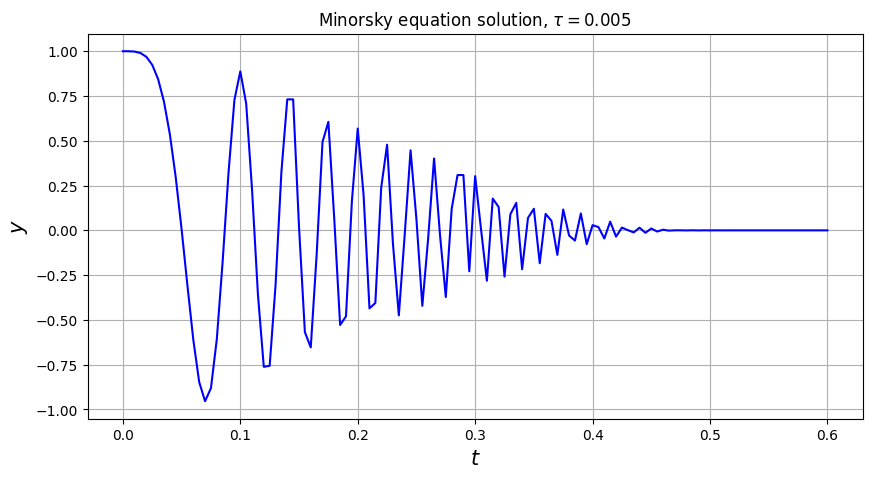

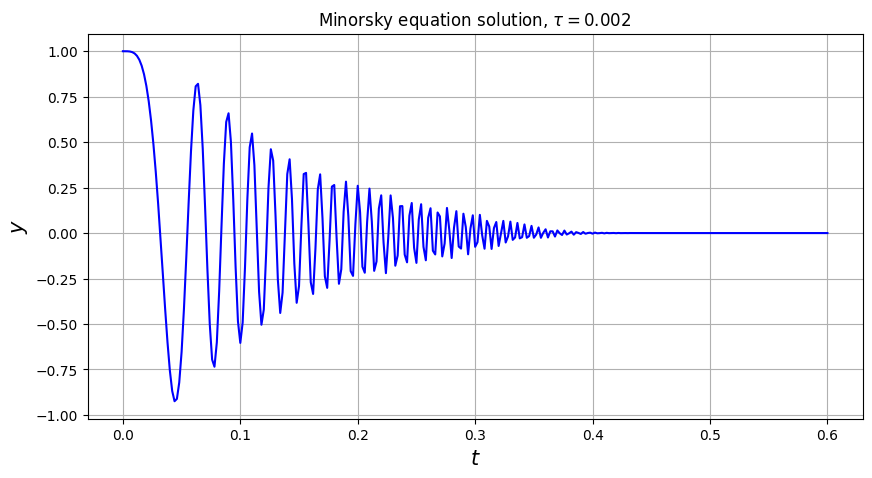

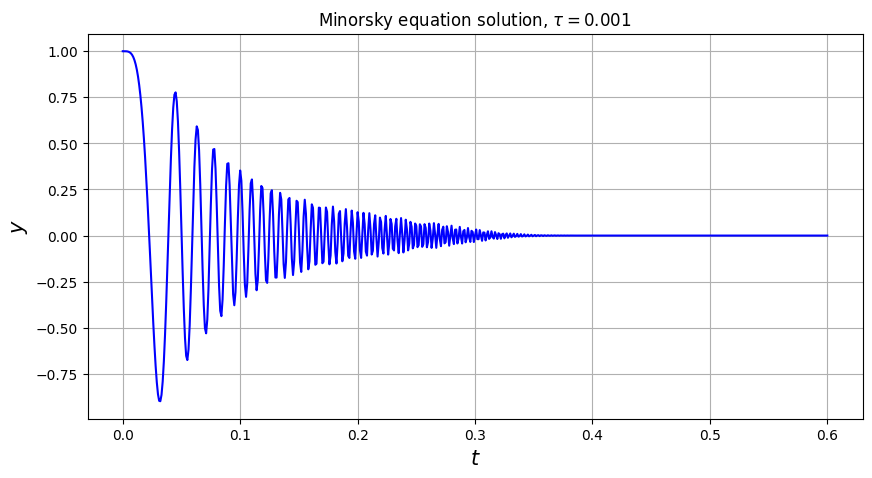

In [31]:
tau = 0.005
t = np.arange(0, 0.6+tau, tau)

y4 = []

for i in t:
    y4.append(runge_kutta4(t0, S4, i, tau, dSdx4, n[0], e[2]))

y4 = np.array(y4)

plt.figure(figsize = (10,5))
plt.plot(t, y4.T[0], 'b')
plt.title(r'Minorsky equation solution, $\tau = 0.005$')
plt.xlabel(r'$t$', fontsize = 15)
plt.ylabel(r'$y$', fontsize = 15)
plt.grid(True)

tau = 0.002
t = np.arange(0, 0.6+tau, tau)

y4 = []

for i in t:
    y4.append(runge_kutta4(t0, S4, i, tau, dSdx4, n[0], e[2]))

y4 = np.array(y4)

plt.figure(figsize = (10,5))
plt.plot(t, y4.T[0], 'b')
plt.title(r'Minorsky equation solution, $\tau = 0.002$')
plt.xlabel(r'$t$', fontsize = 15)
plt.ylabel(r'$y$', fontsize = 15)
plt.grid(True)

tau = 0.001
t = np.arange(0, 0.6+tau, tau)

y4 = []

for i in t:
    y4.append(runge_kutta4(t0, S4, i, tau, dSdx4, n[0], e[2]))

y4 = np.array(y4)

plt.figure(figsize = (10,5))
plt.plot(t, y4.T[0], 'b')
plt.title(r'Minorsky equation solution, $\tau = 0.001$')
plt.xlabel(r'$t$', fontsize = 15)
plt.ylabel(r'$y$', fontsize = 15)
plt.grid(True)

/var/folders/3h/fywk_2bj05b835jspdxg__2r0000gn/T/ipykernel_2215/2835687381.py:3: RuntimeWarning: overflow encountered in scalar multiply
  return np.array([v, 2*v - n*n*np.pi*np.pi*y + 2*v*(t - 1) + e*(v*v*v)*(t - 1)])
/var/folders/3h/fywk_2bj05b835jspdxg__2r0000gn/T/ipykernel_2215/2835687381.py:3: RuntimeWarning: invalid value encountered in scalar add
  return np.array([v, 2*v - n*n*np.pi*np.pi*y + 2*v*(t - 1) + e*(v*v*v)*(t - 1)])


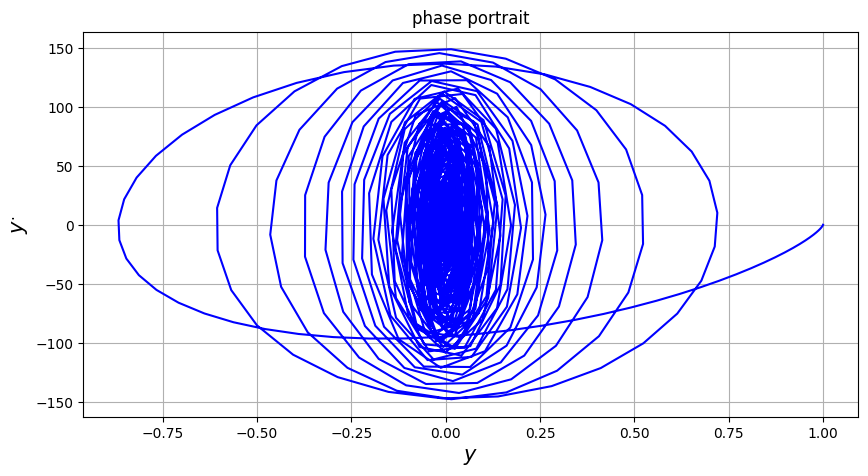

In [42]:
tau = 0.0005
t = np.arange(0, 0.6+tau, tau)

y4 = []

for i in t:
    y4.append(runge_kutta4(t0, S4, i, tau, dSdx4, n[0], e[2]))

y4 = np.array(y4)

plt.figure(figsize = (10,5))
plt.plot(y4.T[0], y4.T[1], 'b')
plt.title(r'phase portrait')
plt.xlabel(r'$y$', fontsize = 15)
plt.ylabel(r'$y^{.}$', fontsize = 15)
plt.grid(True)